In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

In [ ]:
def function1(x, y):
  """
    Функція на R2
  """
  return x*x + 18*y*y + 0.01*x*y + x - y


def function2(x, y):
  """
    функція Розенброка
  """
  return (y-x**2)**2 + (1-x)**2


def first_der(func, x, y, h):
  """
    Перші часткові похідні за означенням (числово)
  """
  return np.array([(func(x+h, y)-func(x-h, y))/(2*h),
                   (func(x, y+h)-func(x, y-h))/(2*h)])


def hessian_matrix(func, x, y, h):
  """
    Матриця Гессе (симетрична квадратична форма функції)
    обчислюємо часткові похідні 2го порядку числово
  """
  dxdx = (func(x+h, y)-2*func(x, y)+func(x-h, y))/(h*h)
  dydy = (func(x, y+h)-2*func(x, y)+func(x, y-h))/(h*h)
  dxdy = (func(x+h, y+h)-func(x+h, y-h)-func(x-h, y+h)+func(x-h, y-h))/(4*h*h)
  return np.array(
        [[dxdx, dxdy],
        [dxdy, dydy]])


def droblennya(func, x, y, l, h):
  """
    Пошук коефіцієнту в методі Ньютона способом дроблення
  """
  f = 0
  a = 1
  while(f!=1):
    if func(x+a*h[0], y+a*h[1]) < func(x, y):
      f=1
    a = a*l
  return a

Ідея методу спряжених напрямків заснована на прагненні
мінімізувати функцію за скінченне число кроків. При цьому все одно використовуватимемо ранню зупинку алгоритму, отримуючи точку екстремуму з певною точністю.

In [ ]:
def optimize_conj_grads(point, max_iter, function, h_diff, step_method = 'const', l = 0.5, eps_drob = 0.01, print_iters = 1):
  """
    Реалізація алгоритму методу
    :param point: точка в R2 або R3 у вигляді list
    :param max_iter: максимальна кількість ітерацій циклу спуску
    :param function: функція, яку мінімізуємо - повертає значення в точці
    :param h_diff: порядок помилки в різницевих формулах похідних
    :param step_method: const або droblennya - метод дроблення
    :param l_drob: коефіцієнт навчання при const або lambda в методі дроблення
    :param eps_drob: довільна константа в методі дроблення
    :param print_iters: бінарний параметр, який відповідає за вивід інформації на ітераціях
    :return: optima - точка оптимуму
             evolution - масив точок-наближень
  """
  x, y = point[0], point[1]

  # масив векторів, значення координат на кожній ітерації
  evolution = [[x, y]]
  iters = max_iter

  h = -first_der(function, x, y, h_diff)
  A = hessian_matrix(function, x, y, h_diff)
  for i in range(max_iter):
    if i % 10 == 0 and print_iters == 1:
      print("Ітерація %i, значення функції: %.5f в точці" %(i, function(x, y)), evolution[i])

    if i != 0:
      f_der = first_der(function, x, y, h_diff)
      b = np.dot(f_der, A.dot(h)) / np.dot(h, A.dot(h))
      h = -f_der + b*h

    if step_method == 'const':
      alpha = l
    if step_method == 'droblennya':
      alpha = droblennya(function, x, y, l, h)

    x = x + alpha * h[0]
    y = y + alpha * h[1]
    evolution = np.vstack((evolution, [[x, y]]))

    # умова ранньої зупинки
    if np.linalg.norm(evolution[i+1]-evolution[i]) < 10**(-5):
      iters = i
      break
  
  print("Кількість ітерацій %i, точка мінімуму" %(iters), evolution[-1])
  print("Отриманий мінімум функції: %.5f" %(function(x, y)))
  return [x, y], evolution

In [ ]:
def plot2D(x_linspace, y_linspace, func, evolution_w):
  """
    Побудова траєкторiї вектору ваг w(t) в площинi W.
  """
  x1 = x_linspace
  x2 = y_linspace
  X1, X2 = np.meshgrid(x1, x2)
  Z = func(X1, X2)
  fig = plt.figure(figsize = (7,5))
  contours = plt.contour(X1, X2, Z, 25, cmap='gist_earth')
  plt.clabel(contours, inline = True, fontsize = 10)
  plt.title("Ітераційний процес на лініях рівня функції", fontsize=12)
  plt.plot(evolution_w[:, 0], evolution_w[:, 1])
  plt.plot(evolution_w[:, 0], evolution_w[:, 1], '^', markerfacecolor='red', markersize=10, label = "Точки наближення")
  plt.xlabel('x', fontsize=11)
  plt.ylabel('y', fontsize=11)
  plt.colorbar()
  plt.legend(loc = "upper right")
  plt.show()

Знайдемо мінімум для першої, опуклої функції (за варіантом). Використовуємо метод дроблення кроку для пошуку коефіцієнту спуску.

Ітерація 0, значення функції: 0.00000 в точці [0, 0]
Ітерація 10, значення функції: -0.26403 в точці [-0.50011498  0.0279144 ]
Кількість ітерацій 10, точка мінімуму [-0.50011965  0.02791907]
Отриманий мінімум функції: -0.26403


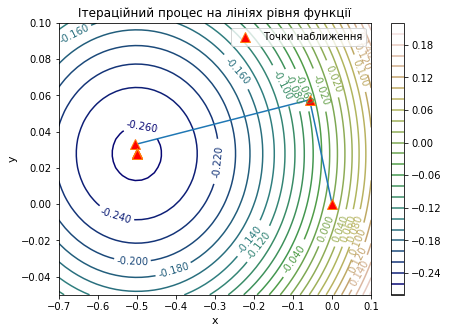

In [ ]:
[x, y], evolution = optimize_conj_grads([0, 0], max_iter = 150, function = function1, h_diff = 0.01, step_method = 'droblennya', l = 0.7)


plot2D(np.linspace(-0.7, 0.1, 50), np.linspace(-0.05, 0.1, 50), function1, evolution)

Ітерація 0, значення функції: 1901.00000 в точці [10, 10]
Ітерація 10, значення функції: -0.26403 в точці [-0.49948179  0.02790901]
Кількість ітерацій 10, точка мінімуму [-0.49948135  0.02791652]
Отриманий мінімум функції: -0.26403


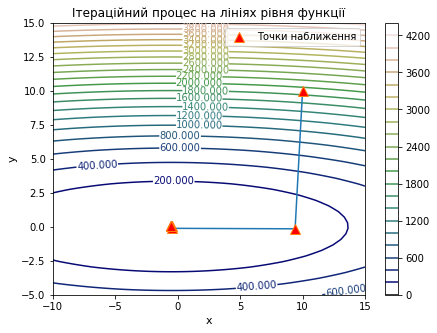

In [ ]:
[x, y], evolution = optimize_conj_grads([10, 10], max_iter = 150, function = function1, h_diff = 0.01, step_method = 'droblennya', l = 0.7)


plot2D(np.linspace(-10, 15), np.linspace(-5, 15), function1, evolution)

Ітерація 0, значення функції: 190100.00000 в точці [100, 100]
Ітерація 10, значення функції: -0.26399 в точці [-0.49388807  0.02784677]
Кількість ітерацій 16, точка мінімуму [-0.50053989  0.02791682]
Отриманий мінімум функції: -0.26403


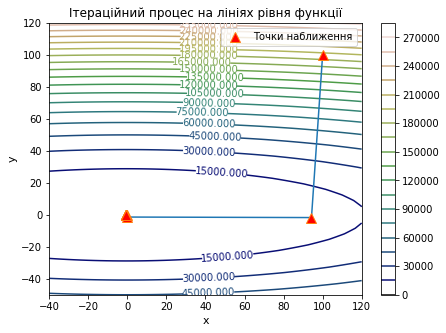

In [ ]:
[x, y], evolution = optimize_conj_grads([100, 100], max_iter = 150, function = function1, h_diff = 0.01, step_method = 'droblennya', l = 0.7)


plot2D(np.linspace(-40, 120, 50), np.linspace(-50, 120, 50), function1, evolution)

Ітерація 0, значення функції: 19010000.00000 в точці [1000, 1000]
Ітерація 10, значення функції: 2.15881 в точці [1.05567723 0.01623662]
Кількість ітерацій 12, точка мінімуму [-0.06752414  0.02665796]
Отриманий мінімум функції: -0.07685


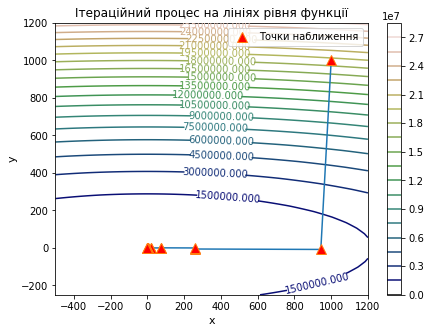

In [ ]:
[x, y], evolution = optimize_conj_grads([1000, 1000], max_iter = 150, function = function1, h_diff = 0.1, step_method = 'droblennya', l = 0.6)


plot2D(np.linspace(-500, 1200), np.linspace(-250, 1200), function1, evolution)

Ітерація 0, значення функції: 1901000000.00000 в точці [10000, 10000]
Ітерація 10, значення функції: 0.12287 в точці [0.12122362 0.02103542]
Кількість ітерацій 18, точка мінімуму [-0.50011078  0.0279167 ]
Отриманий мінімум функції: -0.26403


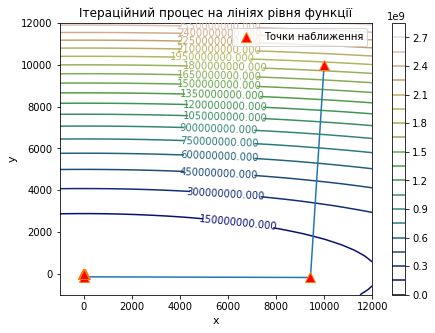

In [ ]:
[x, y], evolution = optimize_conj_grads([10000, 10000], max_iter = 150, function = function1, h_diff = 0.01, step_method = 'droblennya', l = 0.7)

plot2D(np.linspace(-1000, 12000, 50), np.linspace(-1000, 12000, 50), function1, evolution)

Тепер дослідимо алгоритм на функції Розенброка. Якщо задати наведені нижче початкові точки, то ітерацій менше, ніж в звичайному градієнтному спуску. 

In [ ]:
[x, y], evolution = optimize_conj_grads([10, 10], max_iter = 40, function = function2, h_diff = 0.01, step_method = 'droblennya', l = 0.7)

Ітерація 0, значення функції: 8181.00000 в точці [10, 10]
Ітерація 10, значення функції: 0.01965 в точці [0.86450363 0.78331554]
Ітерація 20, значення функції: 0.00029 в точці [0.98332542 0.97005813]
Ітерація 30, значення функції: 0.00000 в точці [0.99785528 0.99609001]
Кількість ітерацій 40, точка мінімуму [0.99969307 0.99943145]
Отриманий мінімум функції: 0.00000


In [ ]:
[x, y], evolution = optimize_conj_grads([100, 100], max_iter = 30, function = function2, h_diff = 0.1, step_method = 'droblennya', l = 0.72)

Ітерація 0, значення функції: 98019801.00000 в точці [100, 100]
Ітерація 10, значення функції: 65.17594 в точці [-7.07294304 49.96712799]
Ітерація 20, значення функції: 61.24565 в точці [-6.82543166 46.49558027]
Кількість ітерацій 30, точка мінімуму [0.91726835 0.86505291]
Отриманий мінімум функції: 0.00740


Алгоритм дуже чутливий до вибору початкової точки та коефіцієнтів спуску для неопуклих функцій, тому збіжність з точки [1000, 1000] не отримали.

In [ ]:
[x, y], evolution = optimize_conj_grads([1000, 1000], max_iter = 1000, function = function2, h_diff = 0.1, step_method = 'droblennya', l = 0.7)

Ітерація 0, значення функції: 998001998001.00000 в точці [1000, 1000]
Ітерація 10, значення функції: 52548.30974 в точці [ -228.23416242 52090.74062552]
Ітерація 20, значення функції: 52545.40418 в точці [ -228.22782546 52087.8496828 ]
Ітерація 30, значення функції: 52542.50100 в точці [ -228.22149286 52084.959189  ]
Ітерація 40, значення функції: 52539.59807 в точці [ -228.21516064 52082.0689465 ]
Ітерація 50, значення функції: 52536.69542 в точці [ -228.20882883 52079.17899968]
Ітерація 60, значення функції: 52533.79307 в точці [ -228.20249754 52076.28935255]
Ітерація 70, значення функції: 52530.89099 в точці [ -228.19616662 52073.39994474]
Ітерація 80, значення функції: 52527.98912 в точці [ -228.18983601 52070.51075278]
Ітерація 90, значення функції: 52525.08746 в точці [ -228.18350568 52067.6217773 ]
Ітерація 100, значення функції: 52522.18605 в точці [ -228.1771757 52064.7330392]
Ітерація 110, значення функції: 52519.28485 в точці [ -228.17084601 52061.8445142 ]
Ітерація 120, зна